**Multi-Filter Edge Detection: A Comparative Study**

**Introduction:**

Edge detection is a crucial technique in image processing, allowing for the identification of boundaries within images. In this project, a variety of classical edge detection filters are applied to a sharpened image, including Sobel, Scharr, Roberts, Prewitt, and Laplacian operators, as well as the Laplacian of Gaussian (LoG) method and Canny edge detection. The goal of this project is to compare the effectiveness of these edge detection techniques in highlighting key features and contours within the image.

By leveraging each filter’s unique convolution kernels, the project explores how different methods respond to the gradient and intensity changes in the image, producing varying results in terms of accuracy and noise sensitivity. Visualizing the output side by side allows for a clear comparison, offering insights into the strengths and weaknesses of each method. This comparative study can guide decisions in selecting the most appropriate edge detection technique based on specific image processing needs, such as in feature extraction, object recognition, or image segmentation.

The project’s approach provides a comprehensive understanding of traditional edge detection techniques, making it a valuable tool for computer vision and digital image analysis applications.

- Mohamed Adnan P K

In [3]:
pip install opencv-python numpy scikit-learn dlib mtcnn mediapipe


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 46.2 MB/s eta 0:00:00


In [4]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
# For edge detection using skimage filters
from skimage.filters import roberts, prewitt
# For SVM & HOG based detection and segmentation
from skimage.feature import hog
from sklearn import svm
from sklearn.model_selection import train_test_split
# For face detection using Dlib
import dlib
# For MediaPipe (e.g., Face Mesh for depth estimation simulation)
import mediapipe as mp
import math


Load and Display the Image

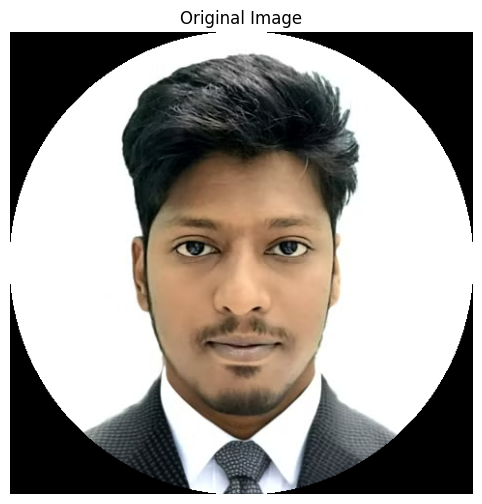

In [5]:
# Change the path to your image file
img_path = '/content/adnan_dp01.jpeg'
image = cv2.imread(img_path)

# Convert from BGR (OpenCV default) to RGB for matplotlib display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8,6))
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')
plt.show()


Basic Processing: Grayscale, Gaussian Blur, and Sharpening

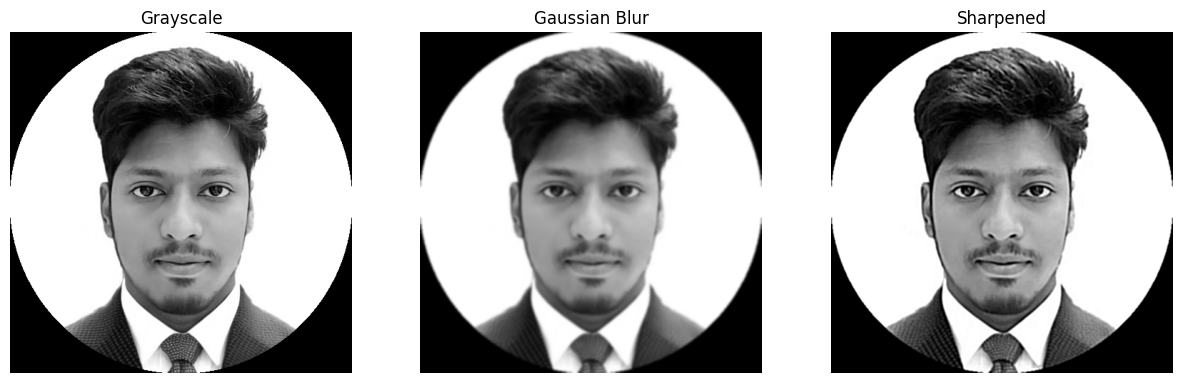

In [6]:
# 1. Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 2. Apply Gaussian Blur
gaussian_blur = cv2.GaussianBlur(gray, (7, 7), 0)

# 3. Sharpen the image using a kernel
sharpen_kernel = np.array([[-1,-1,-1],
                           [-1, 9,-1],
                           [-1,-1,-1]])
sharpened = cv2.filter2D(gaussian_blur, -1, sharpen_kernel)

# Display the results
fig, axs = plt.subplots(1, 3, figsize=(15,5))
axs[0].imshow(gray, cmap='gray')
axs[0].set_title("Grayscale")
axs[0].axis("off")
axs[1].imshow(gaussian_blur, cmap='gray')
axs[1].set_title("Gaussian Blur")
axs[1].axis("off")
axs[2].imshow(sharpened, cmap='gray')
axs[2].set_title("Sharpened")
axs[2].axis("off")
plt.show()


Edge Detection Techniques

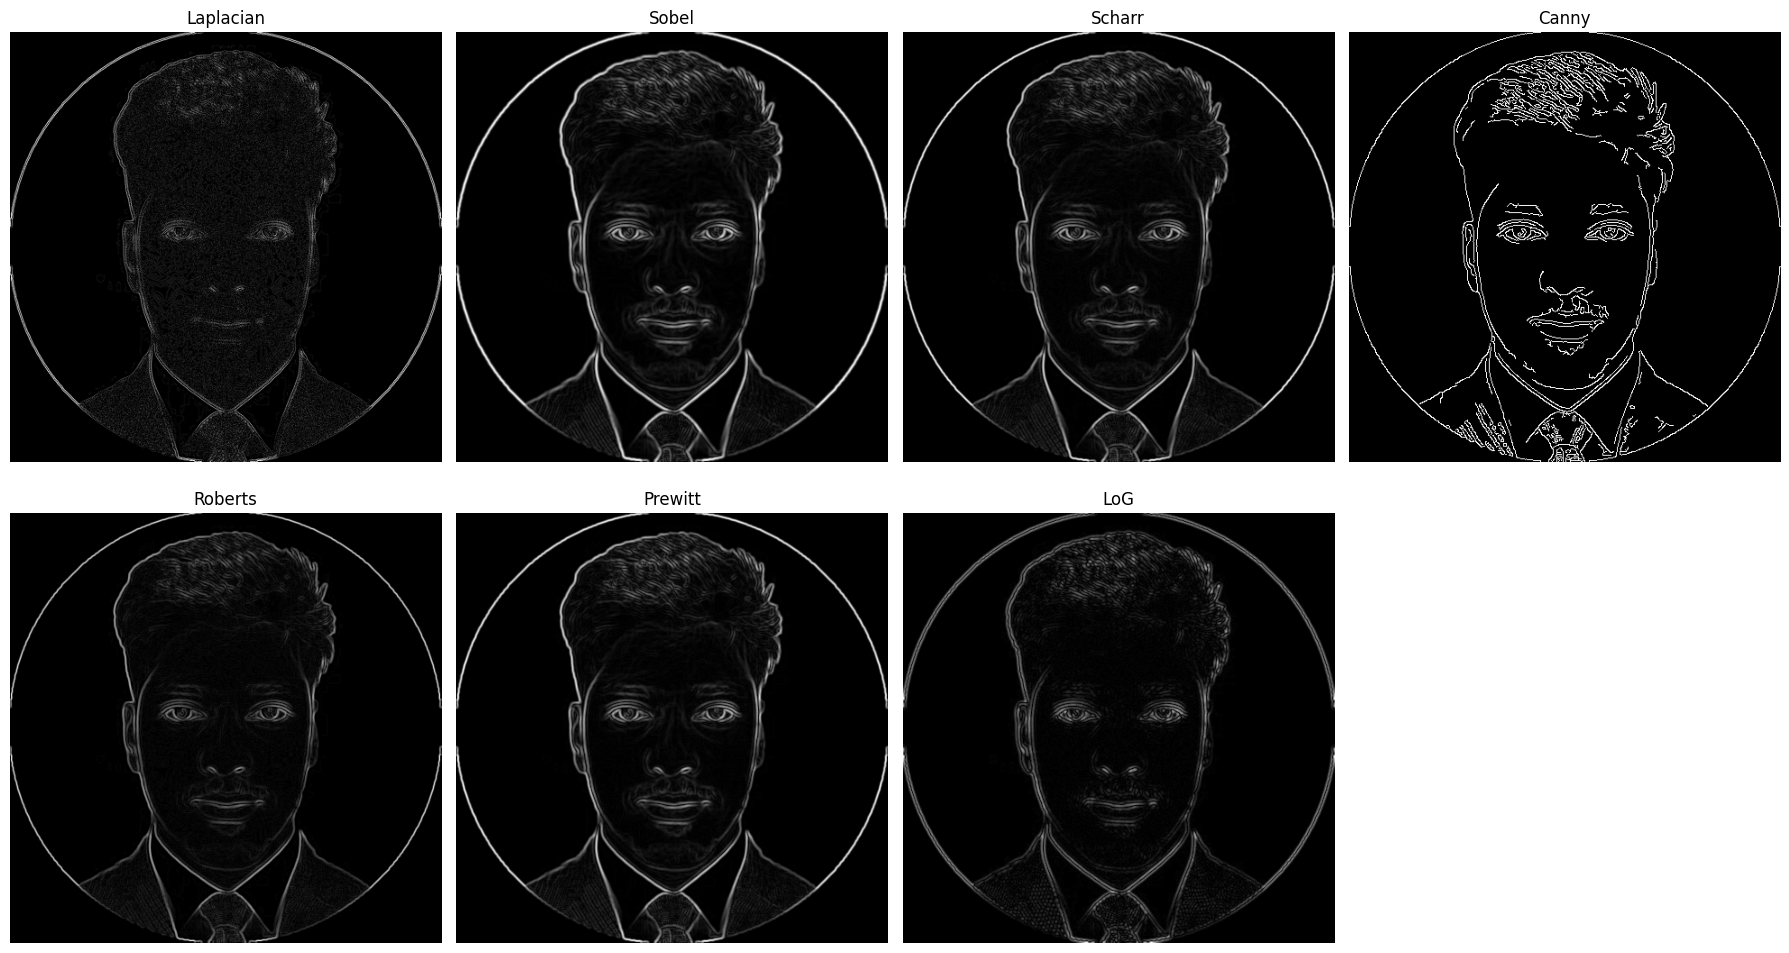

In [7]:
# # Using the sharpened (or gray) image for edge detection

# # Laplacian Edge Detection
# laplacian = cv2.Laplacian(sharpened, cv2.CV_64F)

# # Sobel Edge Detection (both x and y directions)
# sobelx = cv2.Sobel(sharpened, cv2.CV_64F, 1, 0, ksize=5)
# sobely = cv2.Sobel(sharpened, cv2.CV_64F, 0, 1, ksize=5)
# sobel = cv2.magnitude(sobelx, sobely)

# # Scharr Edge Detection
# scharrx = cv2.Scharr(sharpened, cv2.CV_64F, 1, 0)
# scharry = cv2.Scharr(sharpened, cv2.CV_64F, 0, 1)
# scharr = cv2.magnitude(scharrx, scharry)

# # Canny Edge Detection
# canny = cv2.Canny(sharpened, 100, 200)

# # Roberts and Prewitt (using skimage)
# # Note: These functions work on float images scaled between 0 and 1.
# normalized = sharpened.astype("float") / 255.0
# roberts_edges = roberts(normalized)
# prewitt_edges = prewitt(normalized)

# # LoG (Laplacian of Gaussian): Apply Gaussian Blur then Laplacian
# blur_for_log = cv2.GaussianBlur(sharpened, (5, 5), 0)
# log_edges = cv2.Laplacian(blur_for_log, cv2.CV_64F)

# # Plot the edge maps
# titles = ['Laplacian', 'Sobel', 'Scharr', 'Canny', 'Roberts', 'Prewitt', 'LoG']
# edges = [laplacian, sobel, scharr, canny, roberts_edges, prewitt_edges, log_edges]

# plt.figure(figsize=(18,10))
# for i in range(len(edges)):
#     plt.subplot(2, 4, i+1)
#     if titles[i] in ['Canny']:
#         plt.imshow(edges[i], cmap='gray')
#     else:
#         plt.imshow(np.absolute(edges[i]), cmap='gray')
#     plt.title(titles[i])
#     plt.axis('off')
# plt.tight_layout()
# plt.show()


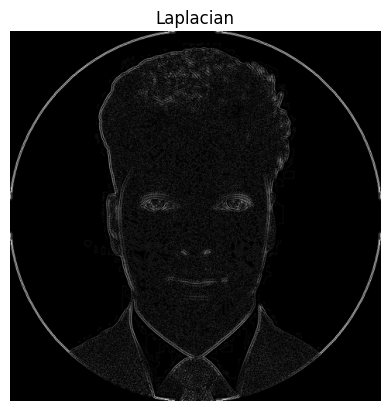

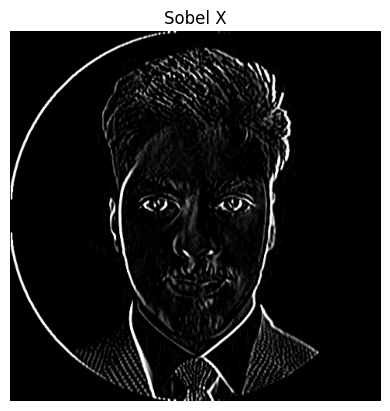

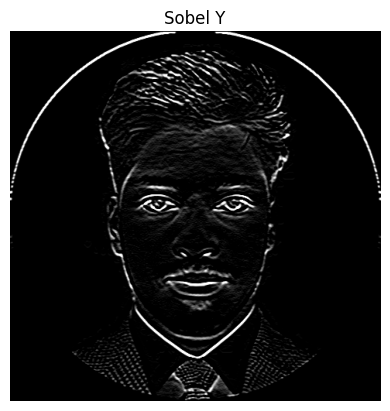

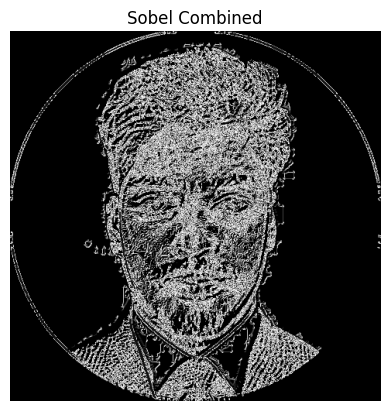

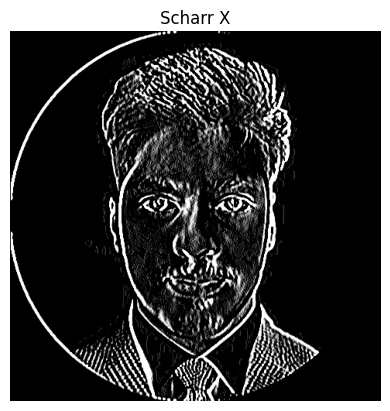

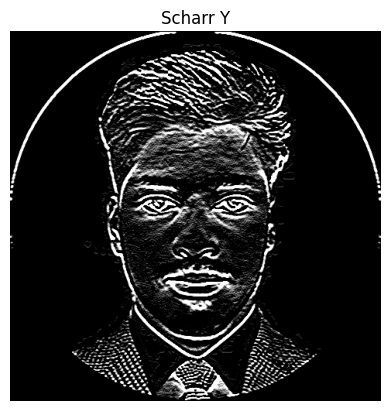

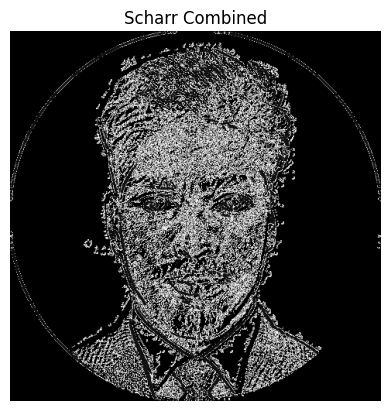

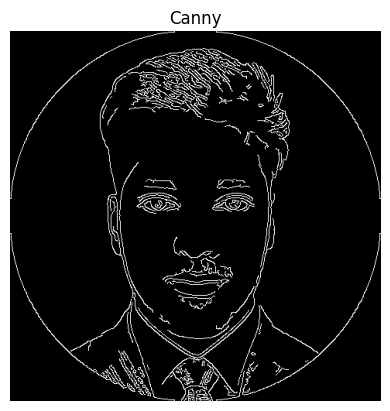

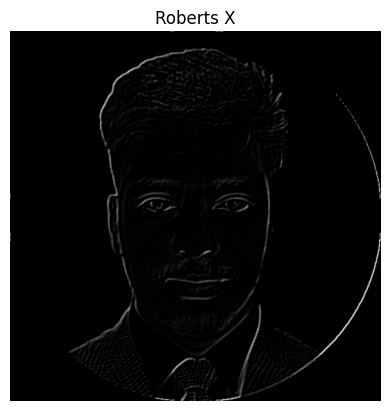

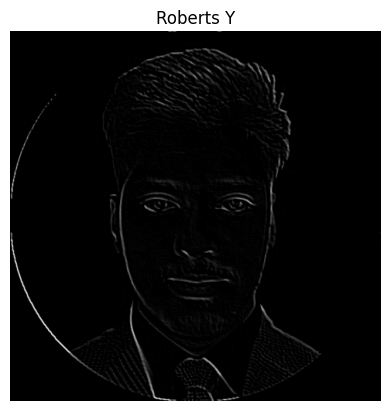

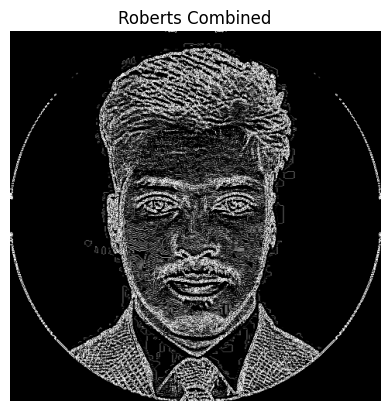

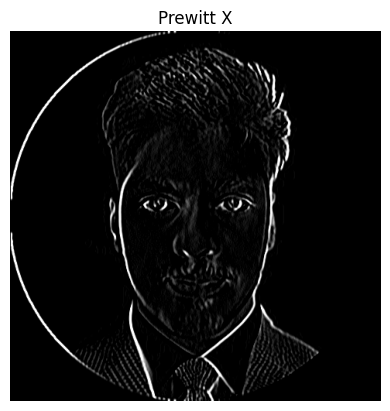

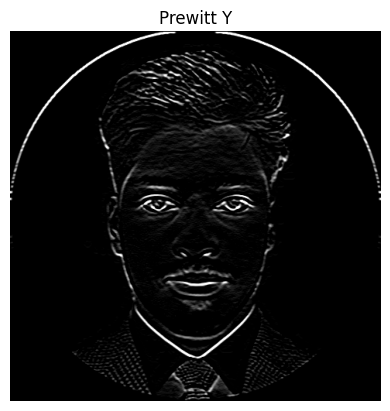

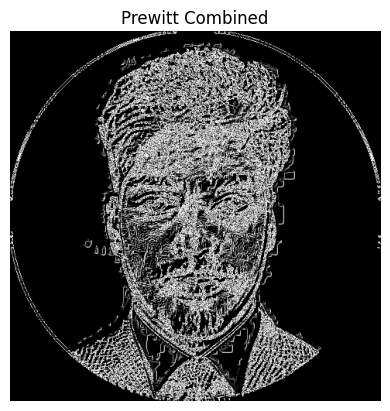

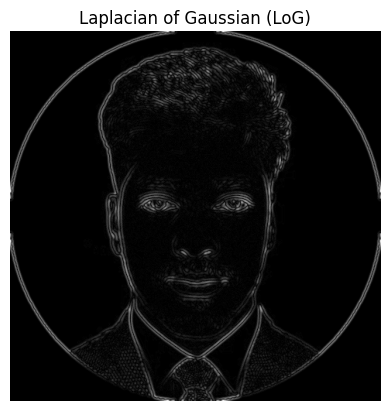

In [14]:
# Sobel Kernels
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]], dtype=np.float32)

sobel_y = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]], dtype=np.float32)

# Scharr Kernels
scharr_x = np.array([[-3, 0, 3],
                     [-10, 0, 10],
                     [-3, 0, 3]], dtype=np.float32)

scharr_y = np.array([[-3, -10, -3],
                     [ 0,   0,  0],
                     [ 3,  10,  3]], dtype=np.float32)

# Roberts Kernels
roberts_x = np.array([[ 1,  0],
                      [ 0, -1]], dtype=np.float32)

roberts_y = np.array([[ 0,  1],
                      [-1,  0]], dtype=np.float32)

# Prewitt Kernels
prewitt_x = np.array([[-1, 0, 1],
                      [-1, 0, 1],
                      [-1, 0, 1]], dtype=np.float32)

prewitt_y = np.array([[-1, -1, -1],
                      [ 0,  0,  0],
                      [ 1,  1,  1]], dtype=np.float32)

# Gaussian Kernel (5x5)
gaussian_kernel = (1/256) * np.array([[1,  4,  6,  4, 1],
                                      [4, 16, 24, 16, 4],
                                      [6, 24, 36, 24, 6],
                                      [4, 16, 24, 16, 4],
                                      [1,  4,  6,  4, 1]], dtype=np.float32)

def apply_convolution(image, kernel):
    return cv2.filter2D(image, -1, kernel)

#Function to compute gradient magnitude manually
def compute_gradient_magnitude(grad_x, grad_y):
    magnitude = np.sqrt(np.square(grad_x) + np.square(grad_y))
    magnitude = np.clip(magnitude, 0, 255)  # Ensure values are within [0, 255]
    return magnitude.astype(np.uint8)

# Apply Sobel filter
sobel_x_image = apply_convolution(sharpened, sobel_x)
sobel_y_image = apply_convolution(sharpened, sobel_y)
sobel_combined = compute_gradient_magnitude(sobel_x_image, sobel_y_image)

# Apply Scharr filter
scharr_x_image = apply_convolution(sharpened, scharr_x)
scharr_y_image = apply_convolution(sharpened, scharr_y)
scharr_combined = compute_gradient_magnitude(scharr_x_image, scharr_y_image)

# Apply Roberts filter
roberts_x_image = apply_convolution(sharpened, roberts_x)
roberts_y_image = apply_convolution(sharpened, roberts_y)
roberts_combined = compute_gradient_magnitude(roberts_x_image, roberts_y_image)

# Apply Prewitt filter
prewitt_x_image = apply_convolution(sharpened, prewitt_x)
prewitt_y_image = apply_convolution(sharpened, prewitt_y)
prewitt_combined = compute_gradient_magnitude(prewitt_x_image, prewitt_y_image)

# Apply Gaussian filter
gaussian_image = apply_convolution(sharpened, gaussian_kernel)

# Laplacian Edge Detection
laplacian = cv2.Laplacian(sharpened, cv2.CV_64F)
laplacian = np.clip(np.absolute(laplacian), 0, 255).astype(np.uint8)

# Laplacian of Gaussian (LoG): Apply Gaussian Blur then Laplacian
blurred_image = apply_convolution(sharpened, gaussian_kernel)
log_edges = cv2.Laplacian(blurred_image, cv2.CV_64F)
log_edges = np.clip(np.absolute(log_edges), 0, 255).astype(np.uint8)

# Canny Edge Detection
canny_edges = cv2.Canny(sharpened, 100, 200)

# Function to display images
def display_image(title, img):
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Display results
display_image('Laplacian', laplacian)
display_image('Sobel X', sobel_x_image)
display_image('Sobel Y', sobel_y_image)
display_image('Sobel Combined', sobel_combined)
display_image('Scharr X', scharr_x_image)
display_image('Scharr Y', scharr_y_image)
display_image('Scharr Combined', scharr_combined)
display_image('Canny', canny_edges)
display_image('Roberts X', roberts_x_image)
display_image('Roberts Y', roberts_y_image)
display_image('Roberts Combined', roberts_combined)
display_image('Prewitt X', prewitt_x_image)
display_image('Prewitt Y', prewitt_y_image)
display_image('Prewitt Combined', prewitt_combined)
display_image('Laplacian of Gaussian (LoG)', log_edges)


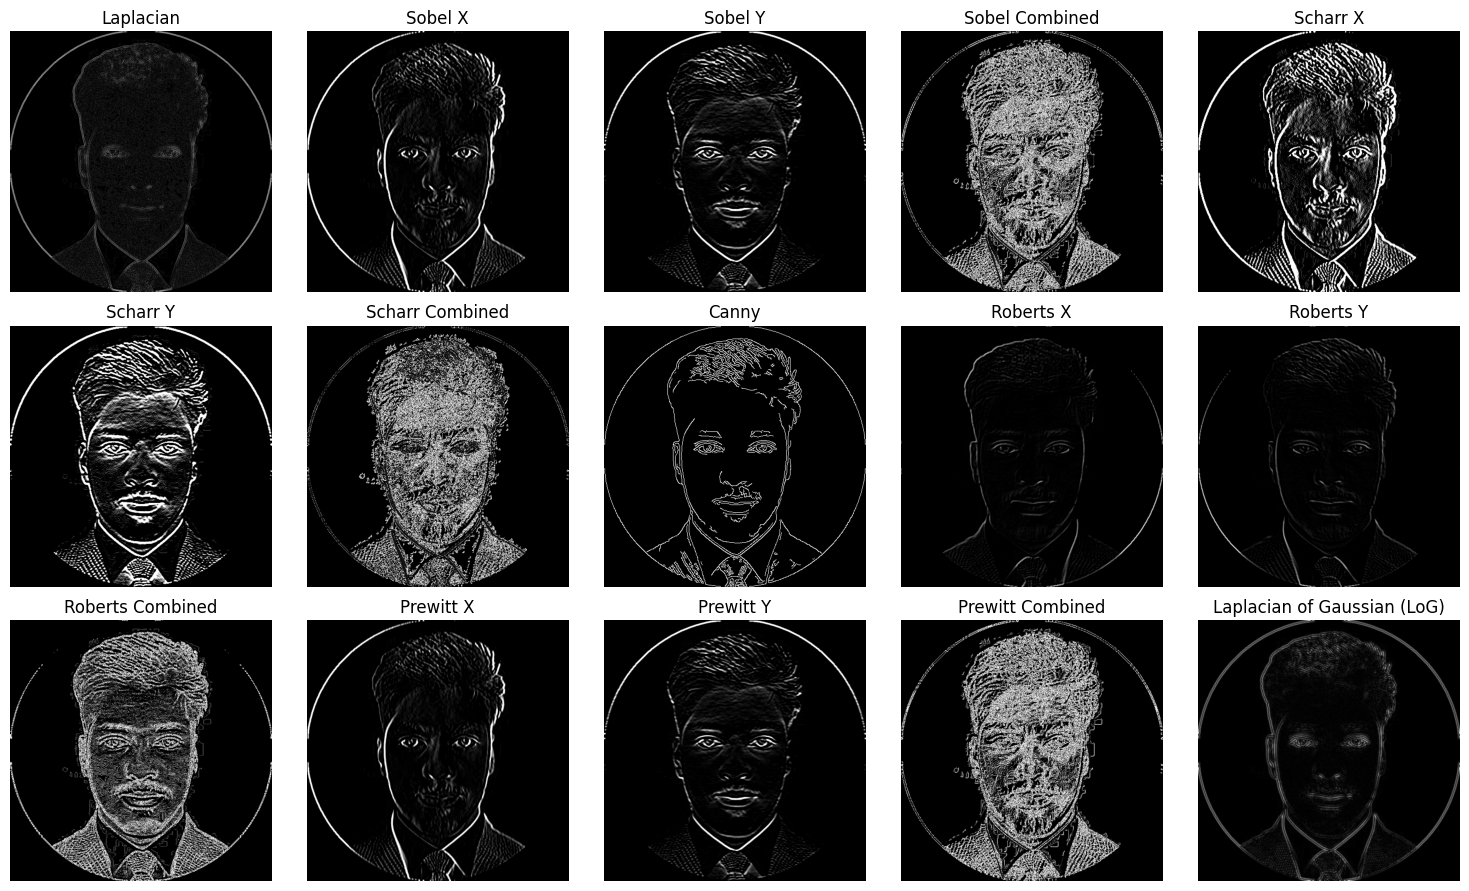

In [24]:
# Modified function to display multiple images side by side
def display_images_side_by_side(titles, images):
    num_images = len(images)
    fig, axes = plt.subplots(3, 5, figsize=(15, 9))
    axes = axes.flatten()
    for ax, title, img in zip(axes, titles, images):
        ax.imshow(img, cmap='gray')
        ax.set_title(title)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Titles and images to display
titles = [
    'Laplacian', 'Sobel X', 'Sobel Y', 'Sobel Combined',
    'Scharr X', 'Scharr Y', 'Scharr Combined', 'Canny',
    'Roberts X', 'Roberts Y', 'Roberts Combined',
    'Prewitt X', 'Prewitt Y', 'Prewitt Combined',
    'Laplacian of Gaussian (LoG)'
]

images = [
    laplacian, sobel_x_image, sobel_y_image, sobel_combined,
    scharr_x_image, scharr_y_image, scharr_combined, canny_edges,
    roberts_x_image, roberts_y_image, roberts_combined,
    prewitt_x_image, prewitt_y_image, prewitt_combined,
    log_edges
]

# Display all images side by side
display_images_side_by_side(titles, images)

Image Segmentation

Adaptive Thresholding, K-Means, HSV Thresholding, and a Placeholder for SVM Segmentation

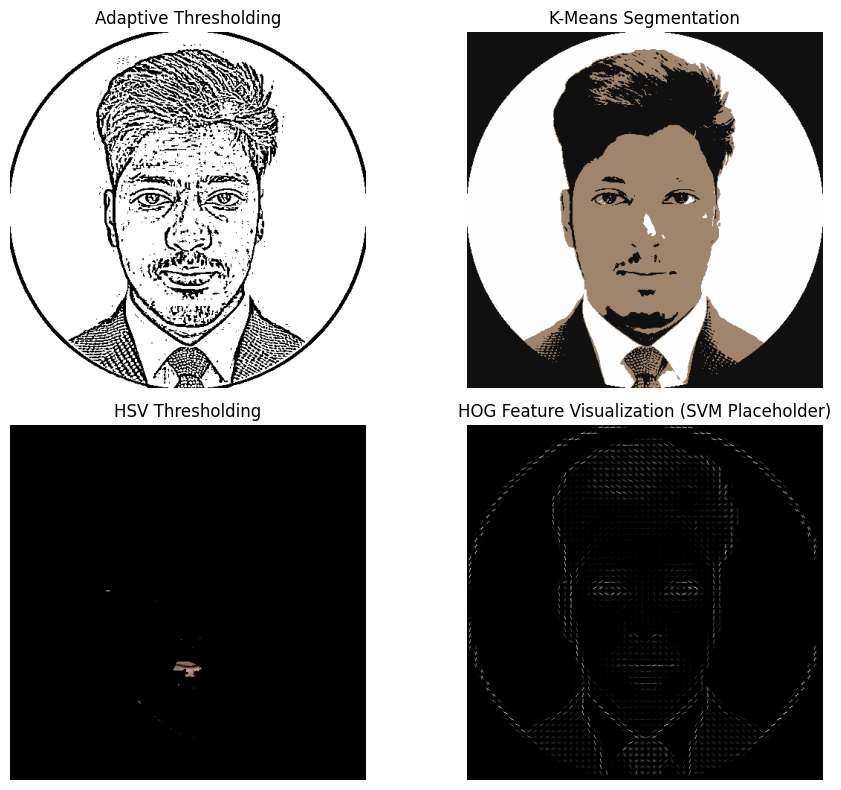

In [25]:
# 1. Adaptive Thresholding (on the grayscale image)
adaptive_thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY, 11, 2)

# 2. K-Means Segmentation
# Reshape the image into a 2D array of pixels and 3 color values (if using original image)
Z = image.reshape((-1,3))
Z = np.float32(Z)

# Define criteria and number of clusters (K)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
ret,label,center=cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
center = np.uint8(center)
kmeans_segmented = center[label.flatten()]
kmeans_segmented = kmeans_segmented.reshape((image.shape))

# 3. HSV Thresholding
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
# Define a sample range (adjust lower/upper bounds as needed)
lower_hsv = np.array([0, 50, 50])
upper_hsv = np.array([10, 255, 255])
hsv_mask = cv2.inRange(hsv, lower_hsv, upper_hsv)
hsv_segmented = cv2.bitwise_and(image, image, mask=hsv_mask)

# 4. SVM Segmentation (Placeholder)
# For a real SVM segmentation, you would need training data and labels.
# Here, we simulate SVM classification on HOG features of small image patches.
# This is a dummy example to illustrate the steps.

# For demonstration, we will extract HOG features from the grayscale image.
features, hog_image = hog(gray, orientations=9, pixels_per_cell=(8, 8),
                          cells_per_block=(2, 2), visualize=True, channel_axis=None)

# Normally, you would split your dataset and train an SVM classifier:
# X_train, X_test, y_train, y_test = train_test_split(features_array, labels_array, test_size=0.2)
# classifier = svm.SVC()
# classifier.fit(X_train, y_train)
# predictions = classifier.predict(features_test)
# In this placeholder, we simply show the HOG image.

# Display segmentation results
fig, axs = plt.subplots(2, 2, figsize=(10,8))
axs[0,0].imshow(adaptive_thresh, cmap='gray')
axs[0,0].set_title("Adaptive Thresholding")
axs[0,0].axis("off")
axs[0,1].imshow(cv2.cvtColor(kmeans_segmented, cv2.COLOR_BGR2RGB))
axs[0,1].set_title("K-Means Segmentation")
axs[0,1].axis("off")
axs[1,0].imshow(cv2.cvtColor(hsv_segmented, cv2.COLOR_BGR2RGB))
axs[1,0].set_title("HSV Thresholding")
axs[1,0].axis("off")
axs[1,1].imshow(hog_image, cmap='gray')
axs[1,1].set_title("HOG Feature Visualization (SVM Placeholder)")
axs[1,1].axis("off")
plt.tight_layout()
plt.show()


Face Detection Using Haar Cascades and Dlib


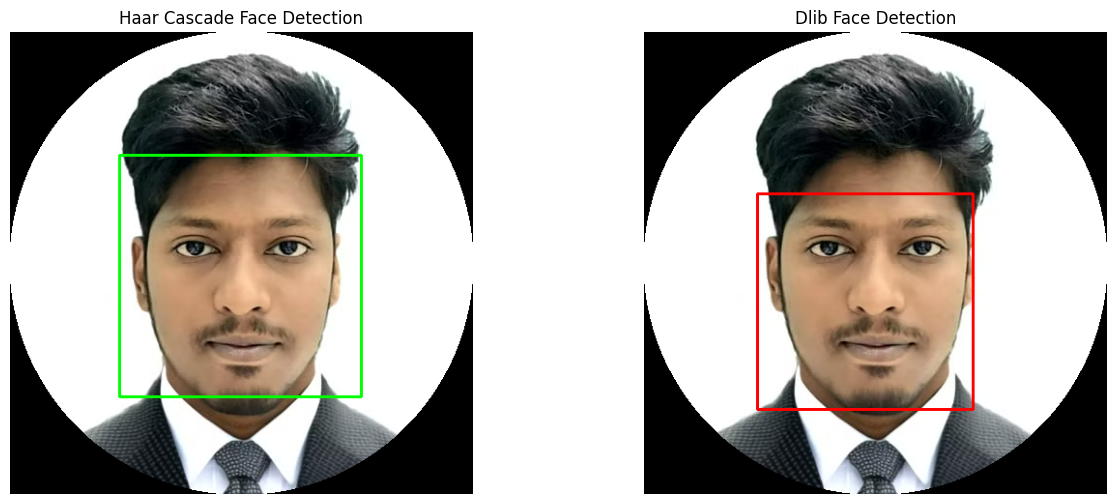

In [9]:
# Load Haar cascade for face detection (ensure the XML file is in your working directory or provide full path)
haar_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Haar Cascade Detection
faces_haar = haar_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
image_haar = image_rgb.copy()
for (x, y, w, h) in faces_haar:
    cv2.rectangle(image_haar, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Dlib Face Detection
dlib_detector = dlib.get_frontal_face_detector()
dlib_faces = dlib_detector(gray, 1)
image_dlib = image_rgb.copy()
for face in dlib_faces:
    cv2.rectangle(image_dlib, (face.left(), face.top()), (face.right(), face.bottom()), (255, 0, 0), 2)

# Display results
fig, axs = plt.subplots(1, 2, figsize=(15,6))
axs[0].imshow(image_haar)
axs[0].set_title("Haar Cascade Face Detection")
axs[0].axis("off")
axs[1].imshow(image_dlib)
axs[1].set_title("Dlib Face Detection")
axs[1].axis("off")
plt.show()


**Depth Estimation with MediaPipe**

Note: MediaPipe does not provide a direct depth estimation solution out‐of‐the‐box. One workaround is to use the 3D face landmarks (from Face Mesh) to get relative depth (z-coordinate) information.

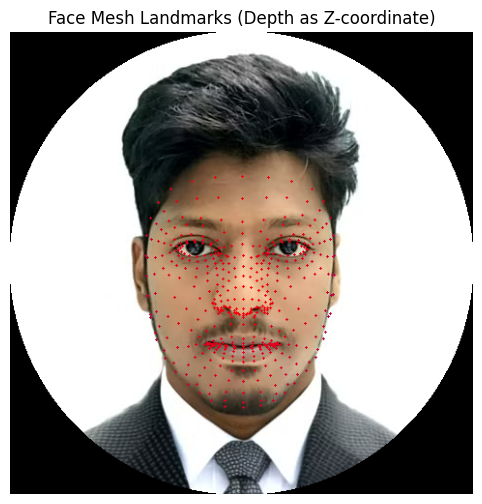

In [10]:
# Initialize MediaPipe Face Mesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True)

# Process the image (convert to RGB as MediaPipe expects)
results = face_mesh.process(image_rgb)

# Create a copy to annotate
image_depth = image_rgb.copy()

if results.multi_face_landmarks:
    for face_landmarks in results.multi_face_landmarks:
        h, w, _ = image_depth.shape
        # Draw landmarks and use z-coordinate as a proxy for depth
        for idx, lm in enumerate(face_landmarks.landmark):
            x, y = int(lm.x * w), int(lm.y * h)
            z = lm.z  # Negative values: closer to camera, positive: further away
            # Color intensity can be based on depth (this is just a visualization)
            color_intensity = int(255 * (1 - min(max((z + 0.1), 0), 1)))
            cv2.circle(image_depth, (x, y), 1, (color_intensity, 0, 255-color_intensity), -1)

plt.figure(figsize=(8,6))
plt.imshow(image_depth)
plt.title("Face Mesh Landmarks (Depth as Z-coordinate)")
plt.axis("off")
plt.show()

face_mesh.close()


**Detection Using SVM + HOG**

Note: For a full detection pipeline, you would train an SVM on HOG features extracted from a dataset of positive and negative samples. The following code demonstrates how to compute HOG features and how you might set up training.

In [11]:
# For demonstration, we will create a dummy dataset by extracting HOG features from parts of the image.
# In practice, you would load a labeled dataset.

# Define a function to extract HOG features from an image patch
def extract_hog_features(img, pixels_per_cell=(8, 8)):
    features, _ = hog(img, orientations=9, pixels_per_cell=pixels_per_cell,
                      cells_per_block=(2, 2), visualize=True, channel_axis=None)
    return features

# Let's create dummy data by taking patches from the grayscale image.
# (This is only for demonstration; proper training requires a dataset.)
patches = []
labels = []  # 1 for "object" and 0 for "background" (dummy labels)
patch_size = 64

h, w = gray.shape
for i in range(0, h - patch_size, patch_size):
    for j in range(0, w - patch_size, patch_size):
        patch = gray[i:i+patch_size, j:j+patch_size]
        patches.append(extract_hog_features(patch))
        # Here, we arbitrarily label patches in the center as object
        if (i > h//3 and i < 2*h//3) and (j > w//3 and j < 2*w//3):
            labels.append(1)
        else:
            labels.append(0)

# Convert to numpy arrays
X = np.array(patches)
y = np.array(labels)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM classifier
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, y_train)

# Evaluate on the test set
accuracy = classifier.score(X_test, y_test)
print("SVM classifier accuracy on dummy data: {:.2f}%".format(accuracy * 100))

# To use this classifier for detection, you would slide a window over your image,
# extract HOG features for each window, and classify them.


SVM classifier accuracy on dummy data: 80.00%


Future plans :

- use real data to train and detect face features.
- using 3d model to create a mesh 3d model from single image